In [1]:
import pandas as pd
import rtree
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

### Importing Shape File

In [2]:
states = gpd.read_file("states/states.shp")

In [3]:
states.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


<AxesSubplot:>

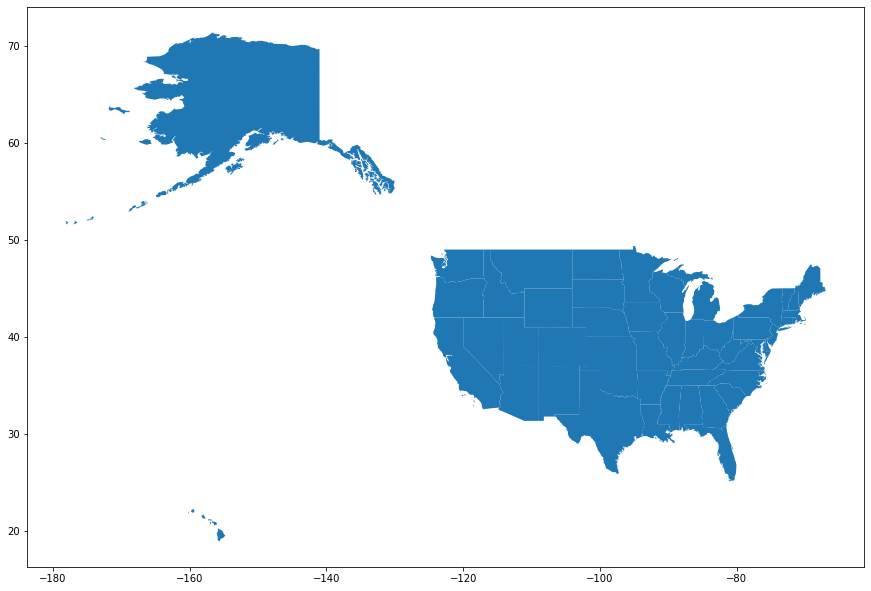

In [26]:
states.plot(figsize=(15,15))

In [5]:
states[states.SUB_REGION == "Pacific"]

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
11,Oregon,12,41,Pacific,OR,"POLYGON ((-121.44151 41.99433, -122.28471 42.0..."
24,California,25,06,Pacific,CA,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."
50,Alaska,51,02,Pacific,AK,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."


<AxesSubplot:>

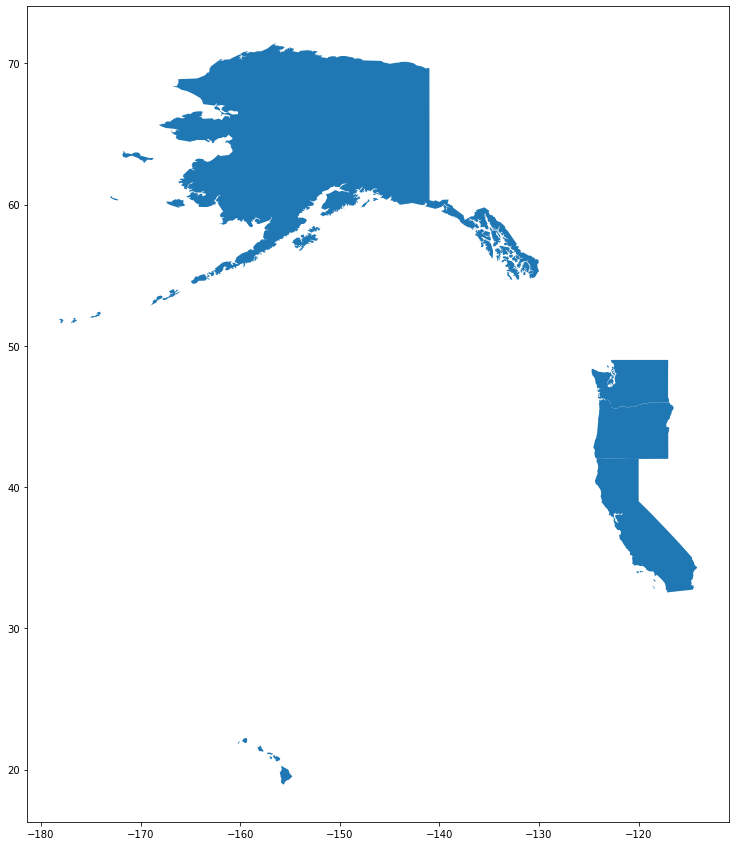

In [27]:
pacific_states = states[states.SUB_REGION == "Pacific"]
pacific_states.plot(figsize=(15,15))

### Importing CSV File

In [7]:
df = pd.read_csv("database.csv")
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


### Converting the CSV data to shape points

In [8]:
points = df.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)

In [9]:
points

0           POINT (145.616 19.246)
1            POINT (127.352 1.863)
2         POINT (-173.972 -20.579)
3          POINT (-23.557 -59.076)
4           POINT (126.427 11.938)
                   ...            
23407    POINT (-118.8941 38.3917)
23408    POINT (-118.8957 38.3777)
23409     POINT (140.4262 36.9179)
23410     POINT (118.6639 -9.0283)
23411     POINT (141.4103 37.3973)
Length: 23412, dtype: object

In [10]:
quakes = gpd.GeoDataFrame(df, geometry=points)
quakes.crs = {'init': 'epsg:4326'}
quakes.head()

c:\users\sethc\appdata\local\programs\python\python37\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,geometry
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,POINT (145.61600 19.24600)
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,POINT (127.35200 1.86300)
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,POINT (-173.97200 -20.57900)
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,POINT (-23.55700 -59.07600)
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,POINT (126.42700 11.93800)


### Plotting Data

<AxesSubplot:>

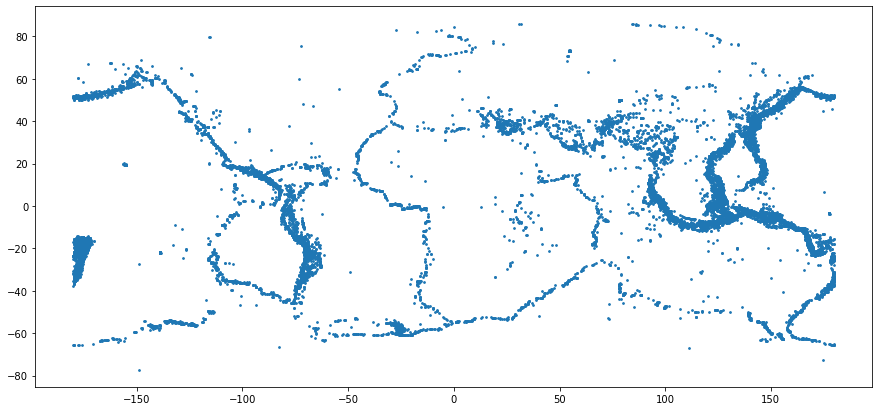

In [11]:
quakes.plot(markersize=3, figsize=(15,15))

In [12]:
states.to_crs(quakes.crs, inplace=True)

In [13]:
quakes_on_states = gpd.sjoin(quakes, states, op="intersects")
quakes_on_states.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Location Source,Magnitude Source,Status,geometry,index_right,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR
123,04/16/1965,23:22:21,64.572,-160.375,Earthquake,15.0,NaN,NaN,6.0,MW,...,ISCGEM,ISCGEM,Automatic,POINT (-160.37500 64.57200),50,Alaska,51,02,Pacific,AK
187,06/27/1965,11:08:59,60.281,-141.418,Earthquake,15.0,NaN,NaN,6.5,MW,...,ISCGEM,ISCGEM,Automatic,POINT (-141.41800 60.28100),50,Alaska,51,02,Pacific,AK
250,09/04/1965,14:32:51,58.090,-152.525,Earthquake,27.8,NaN,NaN,7.0,MW,...,ISCGEM,ISCGEM,Automatic,POINT (-152.52500 58.09000),50,Alaska,51,02,Pacific,AK
251,09/08/1965,03:26:22,57.513,-152.263,Earthquake,25.0,NaN,NaN,5.7,MW,...,ISCGEM,ISCGEM,Automatic,POINT (-152.26300 57.51300),50,Alaska,51,02,Pacific,AK
531,10/07/1966,20:55:57,61.580,-150.126,Earthquake,55.0,NaN,NaN,5.6,MW,...,ISCGEM,ISCGEM,Automatic,POINT (-150.12600 61.58000),50,Alaska,51,02,Pacific,AK


In [14]:
import matplotlib.pyplot as plt

In [15]:
pacific_states = states[states.SUB_REGION == "Pacific"]

<AxesSubplot:>

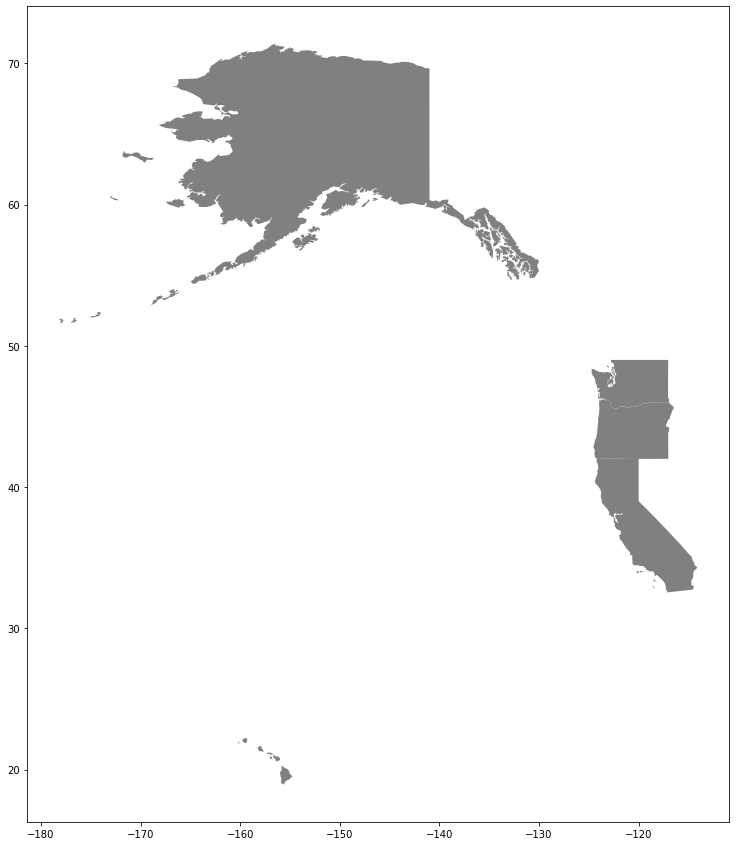

In [21]:
fig, ax = plt.subplots(figsize=(15,15)) 
pacific_states.plot(ax=ax, color="grey")

<AxesSubplot:>

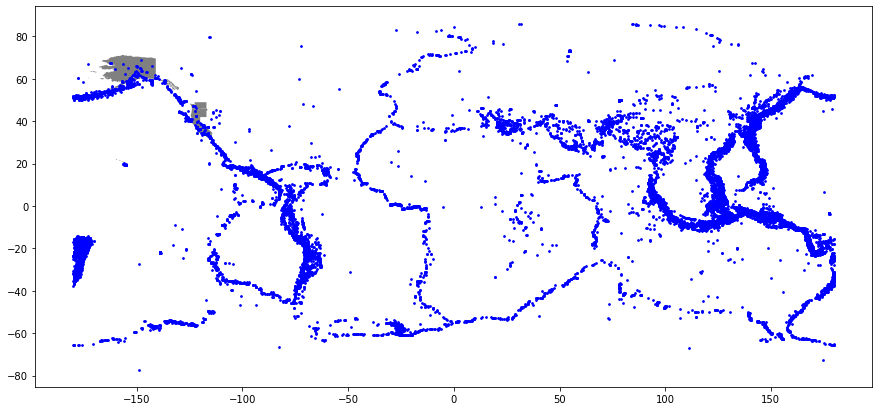

In [24]:
fig, ax = plt.subplots(figsize=(15,15)) 
pacific_states.plot(color='grey',ax=ax)
quakes.plot(ax=ax, color='blue', markersize=3)

<AxesSubplot:>

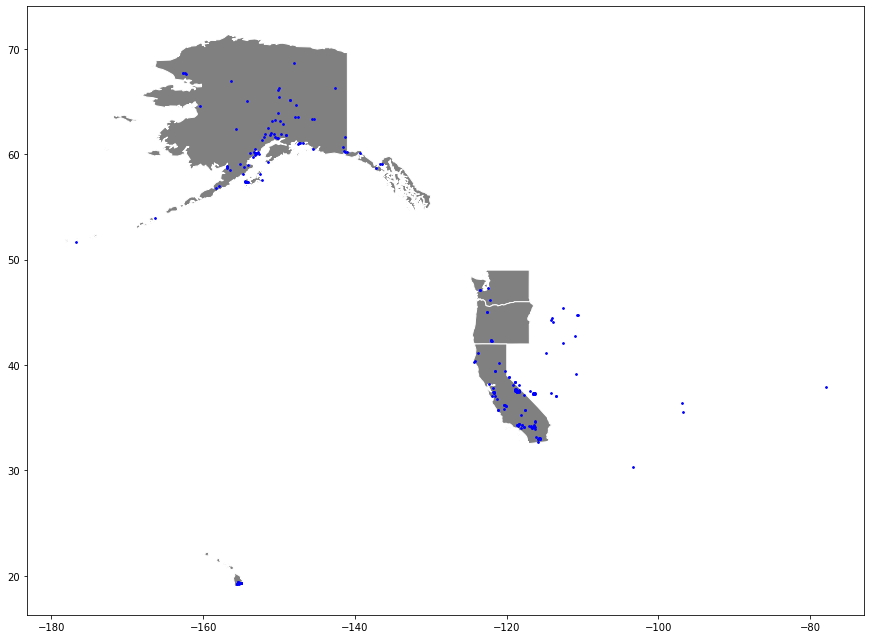

In [18]:
fig, ax = plt.subplots(figsize=(15,15)) 

pacific_states.plot(color='grey',edgecolor='white',ax=ax)
quakes_on_states.plot(ax=ax, color='blue', markersize=3)